## Análisis de las velocidades actuales de conexión a nivel provincial 

Como Excel no permite el guardado de todas las hojas de un archivo .xlsx cuando lo quiero pasar a .csv, uso Pandas para ver y guardar cada una por separado.

In [2]:
import pandas as pd

In [3]:
#Veo cada hoja del archivo excel "internet.xlsx" con pandas.
df = pd.read_excel(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\Internet.xlsx', sheet_name="Velocidad_sin_Rangos")

In [34]:
#Guardo cada hoja por separado para poder realizarles el EDA.
df.to_csv("Velocidad_sin_Rangos.csv", index=False)

In [4]:
df = pd.read_csv(r'C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\SPI\Segundo_proyecto_individual\Datasets\Acc_vel_loc_sinrangos.csv', sep=';')

In [5]:
df.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"0,5",2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"0,75",19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"3,5",145.0


In [54]:
df.shape

(18864, 6)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  object 
 5   Accesos           18857 non-null  float64
dtypes: float64(1), object(5)
memory usage: 884.4+ KB


In [56]:
#Cuento los valores nulos por columna
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

Partido             0
Localidad           0
link Indec          1
Velocidad (Mbps)    0
Provincia           0
Accesos             7
dtype: int64


In [9]:
print(df["Provincia"].unique())

['0' '0,5' '0,75' '3' '3,5' '6' '8' '10' '15' '20' '25' '30' '40' '50'
 '80' '100' '300' '500' '5' '2' '4' '65' '7' '1000' '1' '31' '61' '35'
 '12' '0,256' '0,512' '60' '75' '150' '200' '600' '24' '999' '51' '9' '11'
 '13' '14' '16' '17' '21' '59' '70' '250' '212' '41' '23' '85' '120' '125'
 '246' '800' '160' '400' '105' '205' '18' '48' '240' '320' '155' '480'
 '55' '49' '256' '102' '90' '32' '2,5' '512' '1,5' '36' '22' '4,5' '7,5'
 '66' '110' '220' '225' '275' '325' '700' '140' '850' '2,2' '3,3' '6,4'
 '10,1' '10,2' '12,3' '20,5' '25,1' '25,5' '50,1' '50,25' '100,1' '100,25'
 '165' '45' '350' '900' '180' '330' '520' '540' '122' '27' '98' '95' '450'
 '1024' '164' '26']


In [10]:
print(df["Partido"].unique())

['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']


Claramente las columnas tienen los nombres cambiados. Procedo a cambiarlos.

In [6]:
df.rename(columns={'Partido': 'Provincia', 'Localidad': 'Partido', 'link Indec': 'Localidad', 'Velocidad (Mbps)': 'link Indec', 'Provincia' : 'Velocidad (Mbps)'}, inplace=True)

In [7]:
df.head()

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"0,5",2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"0,75",19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"3,5",145.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   link Indec        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  object 
 5   Accesos           18857 non-null  float64
dtypes: float64(1), object(5)
memory usage: 884.4+ KB


Ya teniendo las columnas bien nombradas veo y modifico tipos de datos

In [8]:
#Cambio el tipo de dato de str a float en la columna 'Velocidad (Mbps)'
df['Velocidad (Mbps)'] = df['Velocidad (Mbps)'].str.replace(',', '.').astype(float)

In [ ]:
#df['Accesos'] = df['Accesos'].astype(int)
#Al querer convertir la columna de float a int salta error porque no puede convertir valores nulos a enteros.

In [85]:
#Veo las filas en las que se encuentran los valores nulos:
valores_nulos = df.loc[df.isnull().any(axis=1)] 
valores_nulos

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
7172,CABA,Ciudad Autónoma de Buenos Aires,NaN,Sin Datos,300.0,-5.582
10510,CORRIENTES,Ituzaingó,Colonia Liebig's,18084010,0.0,NaN
11288,ENTRE RIOS,Tala,Rosario del Tala,30091100,0.0,NaN
14784,SALTA,Cafayate,Tolombón,66021020,0.0,NaN
15288,SALTA,San Carlos,Animaná,66154020,0.0,NaN
15294,SALTA,San Carlos,San Carlos,66154040,0.0,NaN
17235,SANTA FE,Rosario,General Lagos,82084150,0.0,NaN
18090,SANTIAGO DEL ESTERO,Choya,Frías,86063040,0.0,NaN


In [9]:
#Elimino los valores nulos ya que son muy poquitos y su velocidad es 0.
df = df.dropna(subset=['Accesos'])

In [10]:
#Ahora si cambio el tipo de dato de la columna Accesos
df['Accesos'] = df['Accesos'].astype(int)

In [88]:
#Corroboro
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18857 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18857 non-null  object 
 1   Partido           18857 non-null  object 
 2   Localidad         18856 non-null  object 
 3   link Indec        18857 non-null  object 
 4   Velocidad (Mbps)  18857 non-null  float64
 5   Accesos           18857 non-null  int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 957.6+ KB


In [89]:
df.describe()

,Velocidad (Mbps),Accesos
count,18857.000000,18857.000000
mean,66.890864,93.702975
std,179.015720,180.163075
min,0.000000,-830.000000
25%,3.000000,2.000000
50%,10.000000,14.000000
75%,30.000000,86.000000
max,1024.000000,998.000000


El minimo en la columna 'Accesos' es un número negativo. Realizo un boxplot en busca de mas outliers

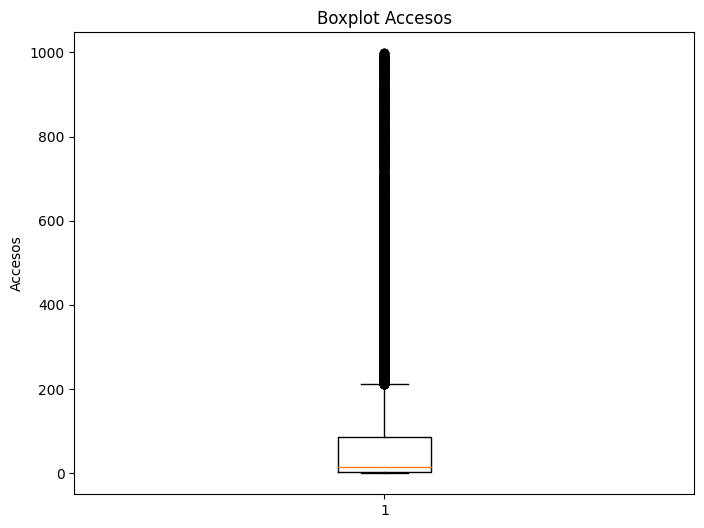

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Accesos'])

plt.title('Boxplot Accesos')
plt.ylabel('Accesos')

plt.show()


In [91]:
#Busco los valores negativos
outliers_negativos = df.loc[df['Accesos'] < 0]
outliers_negativos

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
7172,CABA,Ciudad Autónoma de Buenos Aires,NaN,Sin Datos,300.0,-5
7226,CABA,Otros,Otros,Sin Datos,0.0,-590
10597,CORRIENTES,Otros,Otros,Sin Datos,0.0,-830
12699,LA RIOJA,Otros,Otros,Sin Datos,0.0,-1


In [11]:
#El valor -5 lo considero un error de tipeo. Lo modifico.
df.loc[df['Accesos'] == -5, 'Accesos'] = 5

In [12]:
#Los otros tres valores tienen velocidad 0 por lo que decido borrarlos. 
df = df[df['Accesos'] >= 0]

In [94]:
df.describe()

,Velocidad (Mbps),Accesos
count,18854.000000,18854.000000
mean,66.901507,93.793784
std,179.027974,179.981288
min,0.000000,0.000000
25%,3.000000,2.000000
50%,10.000000,14.000000
75%,30.000000,86.000000
max,1024.000000,998.000000


Busco datos duplicados

In [98]:
duplicados = df[df.duplicated()]
duplicados

#No hay datos dupicados.

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos


### Investigación de correlaciones

Veo si hay algun tipo de relación entre accesos y Velocidad de conexión por medio de un gráfico de dispersión

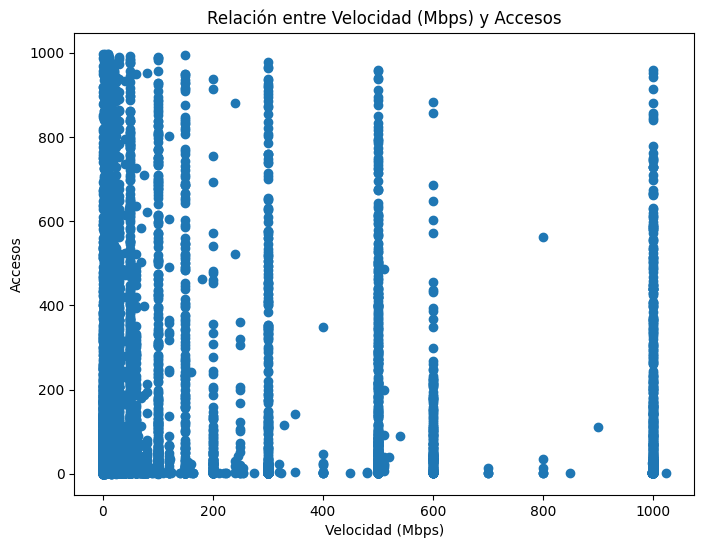

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Velocidad (Mbps)'], df['Accesos'])
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Accesos')
plt.title('Relación entre Velocidad (Mbps) y Accesos')
plt.show()


In [100]:
#A simple vista no veo relaciones claras. Calculo la correlación entre 'Velocidad (Mbps)' y 'Accesos'
correlacion = df['Velocidad (Mbps)'].corr(df['Accesos'])
print(f'Correlación entre Velocidad (Mbps) y Accesos: {correlacion}')

Correlación entre Velocidad (Mbps) y Accesos: 0.12153135136857318


*Aunque se puede ver que la mayoría de las conexiones se dan a una velocidad de entre 0 y 100 Mbps, la correlación es muy débil.*

Ahora observaré correlaciones entre Provincias y promedio de accesos y velocidades

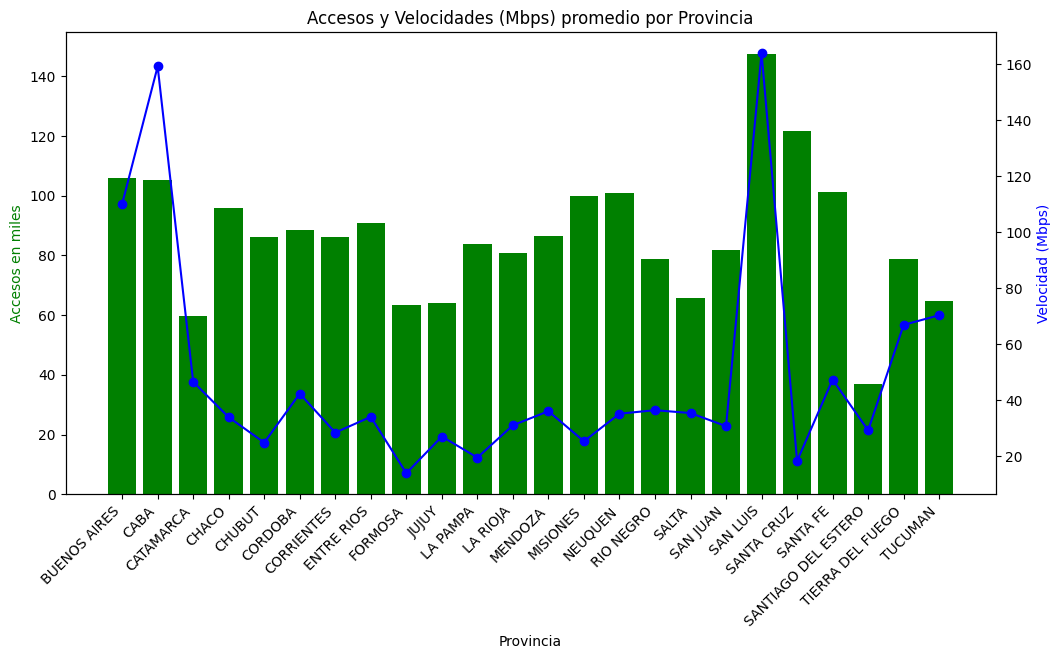

In [13]:
# Agrupo por provincias y calculo la media de 'Accesos' y 'Velocidad (Mbps)'
agrupo_provincias = df.groupby('Provincia')[['Accesos', 'Velocidad (Mbps)']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(agrupo_provincias['Provincia'], agrupo_provincias['Accesos'], color='g')
ax2.plot(agrupo_provincias['Provincia'], agrupo_provincias['Velocidad (Mbps)'], color='b', marker='o')

ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos en miles', color='g')
ax2.set_ylabel('Velocidad (Mbps)', color='b')

ax1.set_xticks(range(len(agrupo_provincias['Provincia'])))
ax1.set_xticklabels(agrupo_provincias['Provincia'], rotation=45, ha='right')

plt.title('Accesos y Velocidades (Mbps) promedio por Provincia')
plt.show()


*La mayoría de los datos se agrupan en la parte inferior izquierda del gráfico, indicando que la mayoría de las provincias tienen una velocidad de acceso y un número de accesos relativamente bajos.*

*Hay algunos datos sobresalientes con respecto al número de accesos y velocidad. Estos pueden indicar provincias que tienen condiciones socioeconomicas y de infraestructura muy diferentes al resto.*

*La correlación de Pearson de 0.12 que pudimos ver anteriormente se confirma visualmente en el gráfico, donde no se observa una clara tendencia de que los accesos aumenten con la velocidad.*

*Aunque algunas provincias tienen velocidades relativamente altas, no necesariamente tienen un número proporcionalmente alto de accesos. Esto puede deberse a la cantidad de población.* 

*El caso llamativo es San Luis pero se explicaría, como vemos en 'Accesos por tecnología', en la fuerte política pública de llevar conectividad wireless a todo su territorio.*
